<a href="https://colab.research.google.com/github/EmB13/ESG-Investment-Decision-Support/blob/main/ESG_Investment_Decision_Support_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SP 500 ESG Risk Ratings.csv')

In [4]:
data.head()

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Level,Controversy Score,ESG Risk Percentile,ESG Risk Level
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.0,0.3,6.3,8.6,Low,1.0,11th percentile,Low
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,12.0,Moderate,2.0,62nd percentile,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",12.0,0.0,3.0,8.0,Moderate,2.0,4th percentile,Negligible
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000","Apple Inc. designs, manufactures, and markets ...",17.0,0.6,9.2,6.9,Significant,3.0,15th percentile,Low
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",28.0,1.1,9.9,16.8,Significant,3.0,55th percentile,Medium


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Symbol                  503 non-null    object 
 1   Name                    503 non-null    object 
 2   Address                 501 non-null    object 
 3   Sector                  501 non-null    object 
 4   Industry                501 non-null    object 
 5   Full Time Employees     496 non-null    object 
 6   Description             501 non-null    object 
 7   Total ESG Risk score    433 non-null    float64
 8   Environment Risk Score  433 non-null    float64
 9   Governance Risk Score   433 non-null    float64
 10  Social Risk Score       433 non-null    float64
 11  Controversy Level       404 non-null    object 
 12  Controversy Score       433 non-null    float64
 13  ESG Risk Percentile     433 non-null    object 
 14  ESG Risk Level          376 non-null    ob

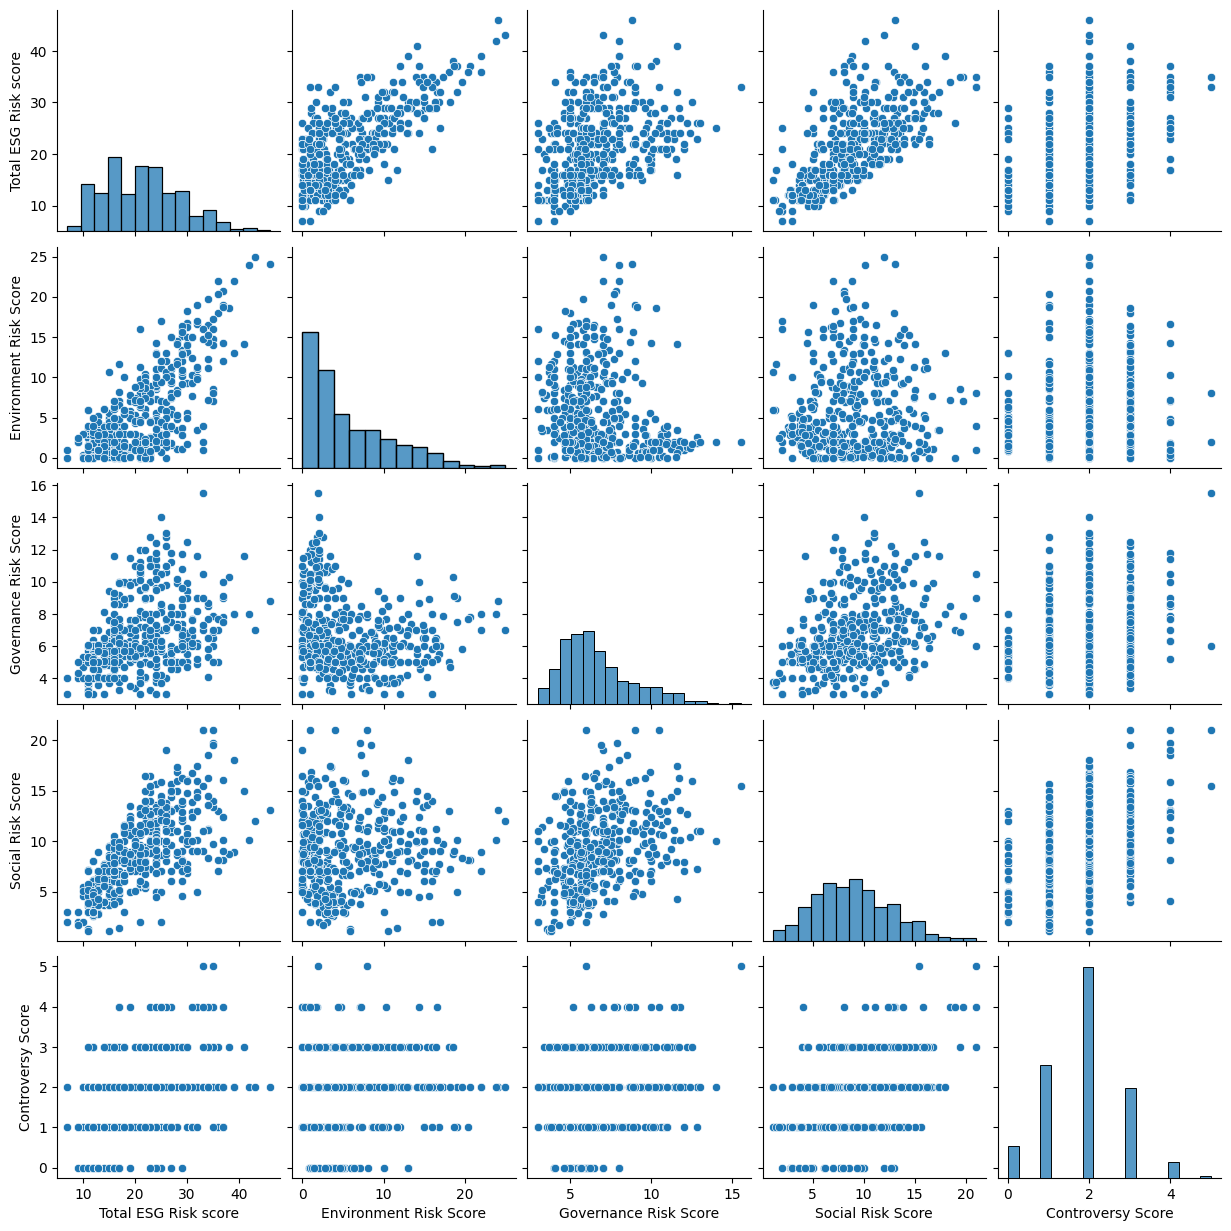

In [7]:
sns.pairplot(data)

<ipython-input-8-ebdb48a70298>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = data.corr()


<Axes: >

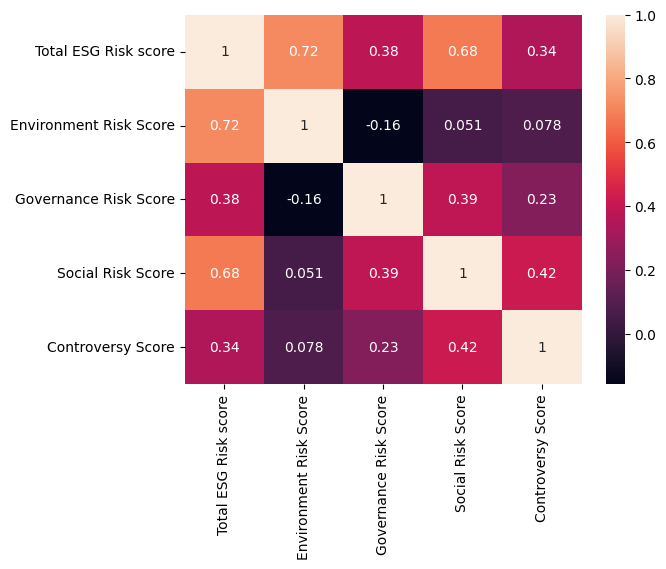

In [8]:
cm = data.corr()
sns.heatmap(cm, annot=True)

In [9]:
df = data[data['Total ESG Risk score'] > 0]

In [10]:
df = df.dropna(subset=['ESG Risk Level'])

In [11]:
X = df[['Total ESG Risk score', 'Controversy Score']]
y = df['ESG Risk Level']


In [12]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [13]:
smote = SMOTE(random_state=42)                            # te dwie linijki dają dużą poprawę przy trenowaniu medeli. Dodają syntetyczne dane aby zbalansować zbiór
X_resampled, y_resampled = smote.fit_resample(X, y)

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled)

#X_test_scaled = scaler.transform(X_test)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

In [17]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

In [18]:
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    'Decision Tree': {'max_depth': [3, 5, 7, None]},
    'Random Forest': {'n_estimators': [50, 100, 200]},
    'SVM': {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]},
    'KNN': {'n_neighbors': [3, 5, 7]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]}
}

In [19]:
predictions = {}

In [22]:
for name, model in models.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_
    model.fit(X_train, y_train)
    predictions[name] = model.predict(X_test)

In [23]:
for name, prediction in predictions.items():
    print(f"Model: {name}")
    print(classification_report(y_test, prediction))

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.58      0.41      0.48        27
           1       0.47      0.54      0.50        26
           2       0.93      0.93      0.93        27
           3       0.48      0.41      0.44        27
           4       0.54      0.70      0.61        27

    accuracy                           0.60       134
   macro avg       0.60      0.60      0.59       134
weighted avg       0.60      0.60      0.59       134

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.72      0.67      0.69        27
           1       0.56      0.77      0.65        26
           2       0.89      0.93      0.91        27
           3       0.68      0.48      0.57        27
           4       0.77      0.74      0.75        27

    accuracy                           0.72       134
   macro avg       0.72      0.72      0.71       134
weighted avg       0.73      